** Create Pictures w/ the MNIST set **

In [1]:
import sys
import os

In [6]:
import numpy as np

In [88]:
import mnist_adv_test
import noise_utils
import pil_utils

In [87]:
x_train, y_train, x_test, y_test, x_test_adv = mnist_adv_test.load_data(
    'data/mnist/adv_set-0.100-0.100-0-60000-0-10000.npz', use_p=.1
)

x_train=(6000, 784), x_test=(985, 784)


In [30]:
from sklearn.neighbors import \
        KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
                metric_params=None, n_jobs=4, n_neighbors=5, p=2,
                weights='distance')

In [32]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='distance')

In [33]:
y_pred = knn.predict(x_test)

In [34]:
y_pred_adv = knn.predict(x_test_adv)

In [35]:
from sklearn.metrics import \
    accuracy_score, confusion_matrix

In [36]:
accuracy_score(y_test, y_pred)

0.9370558375634518

In [37]:
accuracy_score(y_test, y_pred_adv)

0.9269035532994924

In [38]:
y_pred_adv_err_index = np.where((y_pred != y_pred_adv) & (y_pred == y_test))

In [39]:
y_pred_adv_err_index

(array([ 29,  73, 122, 128, 134, 159, 209, 215, 258, 342, 351, 388, 403,
        408, 424, 502, 512, 542, 591, 706, 855, 882, 921]),)

5 5 3


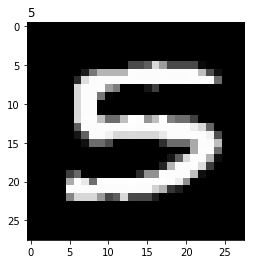

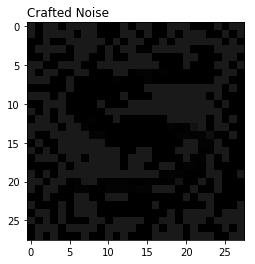

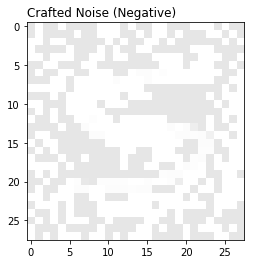

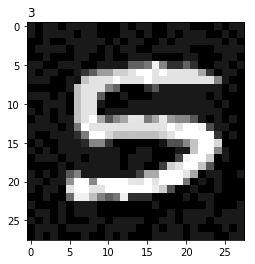

In [83]:
i = 134
print(y_test[i], y_pred[i], y_pred_adv[i])
noise = (x_test_adv[i] - x_test[i]).clip(0, 1)
mnist_adv_test.plot_x(x_test[i], y_pred[i])
mnist_adv_test.plot_x(noise, 'Crafted Noise')
mnist_adv_test.plot_x(1 - noise, 'Crafted Noise (Negative)')
mnist_adv_test.plot_x(x_test_adv[i], y_pred_adv[i])

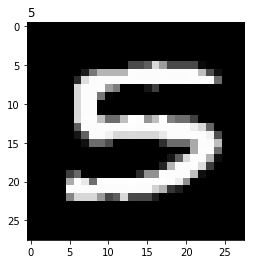

In [84]:
mnist_adv_test.plot_x(x_test[i], y_test[i])

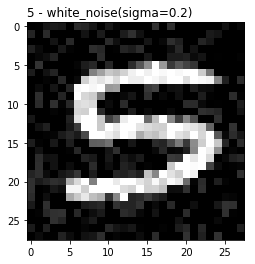

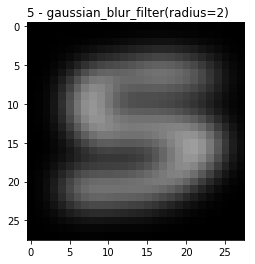

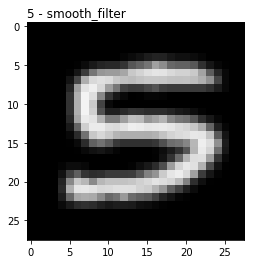

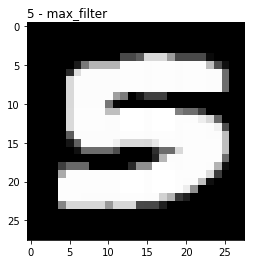

In [91]:
i = 134
for noiser, noise_args in [
    #(noise_utils.white_noise, dict(sigma=.01)),
    #(noise_utils.white_noise, dict(sigma=.02)),
    #(noise_utils.white_noise, dict(sigma=.05)),
    #(noise_utils.white_noise, dict(sigma=.1)),
    (noise_utils.white_noise, dict(sigma=.2)),
    #(noise_utils.white_noise, dict(sigma=.5)),

    (pil_utils.gaussian_blur_filter, dict(radius=2)),
    #(pil_utils.gaussian_blur_filter, dict(radius=5)),

    (pil_utils.smooth_filter, {}),
    #(pil_utils.smooth_more_filter, {}),

    #(pil_utils.rank_filter, {}),
    #(pil_utils.median_filter, {}),
    #(pil_utils.min_filter, {}),
    (pil_utils.max_filter, {}),     

    #(pil_utils.kernel_filter, dict(size=(3, 3), kernel=[.1, .2, .1, .2, .8, .2, .1, .2, .1])),
]:
    noised = noiser(x_test[i].reshape(mnist_adv_test.MNIST_SHAPE), **noise_args).flatten()
    mnist_adv_test.plot_x(
        noised, 
        '{} - {}'.format(y_test[i], 
                         mnist_adv_test.get_noiser_info(noiser, noise_args))
    )

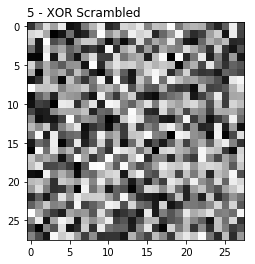

In [93]:
mnist_adv_test.plot_x(mnist_adv_test.apply_pr(x_test[i]), '{} - XOR Scrambled'.format(y_test[i]))